In [16]:

# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [17]:
# Update path after downloading from Kaggle
df = pd.read_csv("Mall_Customers.csv")

In [18]:
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [19]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [20]:
print(df.describe())

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


In [21]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


Text(0.5, 1.0, 'Age Distribution')

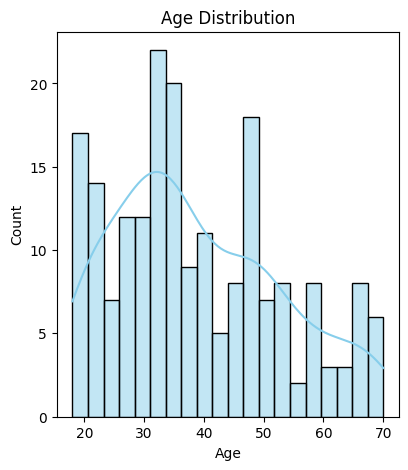

In [22]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.histplot(df["Age"], kde=True, bins=20, color="skyblue")
plt.title("Age Distribution")

Text(0.5, 1.0, 'Annual Income Distribution')

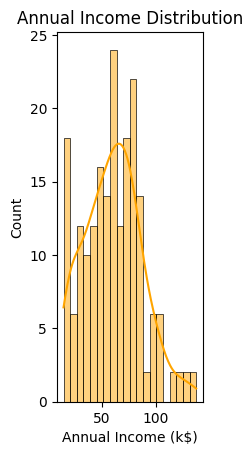

In [23]:
plt.subplot(1,3,2)
sns.histplot(df["Annual Income (k$)"], kde=True, bins=20, color="orange")
plt.title("Annual Income Distribution")

Text(0.5, 1.0, 'Spending Score Distribution')

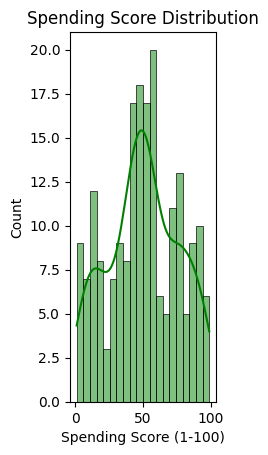

In [24]:
plt.subplot(1,3,3)
sns.histplot(df["Spending Score (1-100)"], kde=True, bins=20, color="green")
plt.title("Spending Score Distribution")

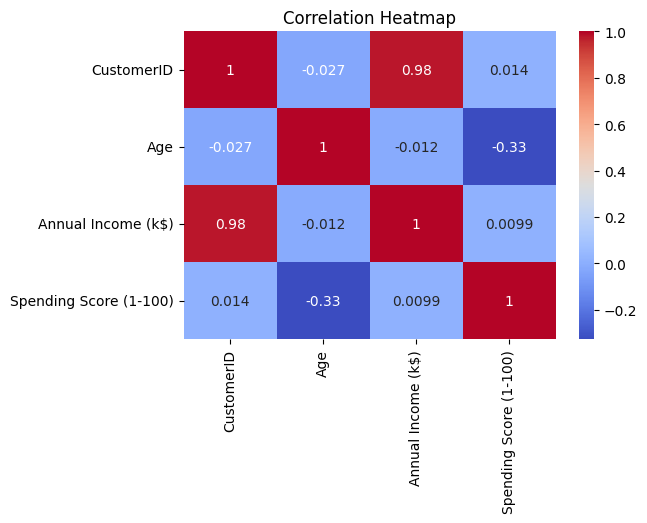

In [25]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [26]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [27]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

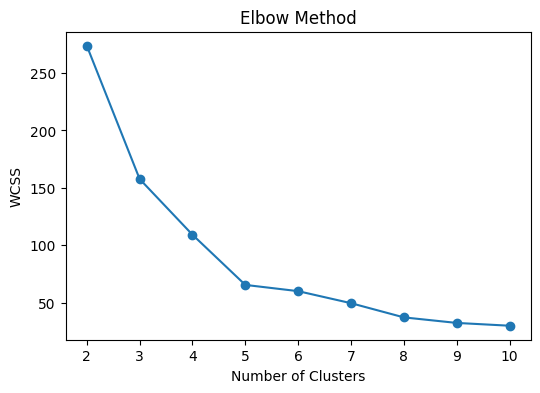

In [28]:
wcss = []
for i in range(2,11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(range(2,11), wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [29]:
for i in range(2,11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f"Silhouette Score for {i} clusters: {score:.3f}")

Silhouette Score for 2 clusters: 0.397
Silhouette Score for 3 clusters: 0.467
Silhouette Score for 4 clusters: 0.494
Silhouette Score for 5 clusters: 0.555
Silhouette Score for 6 clusters: 0.514
Silhouette Score for 7 clusters: 0.502
Silhouette Score for 8 clusters: 0.455
Silhouette Score for 9 clusters: 0.457
Silhouette Score for 10 clusters: 0.445


In [30]:
kmeans = KMeans(n_clusters=5, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)

print("\nCluster Centers (in scaled values):")
print(kmeans.cluster_centers_)


Cluster Centers (in scaled values):
[[-0.20091257 -0.02645617]
 [ 0.99158305  1.23950275]
 [-1.32954532  1.13217788]
 [ 1.05500302 -1.28443907]
 [-1.30751869 -1.13696536]]


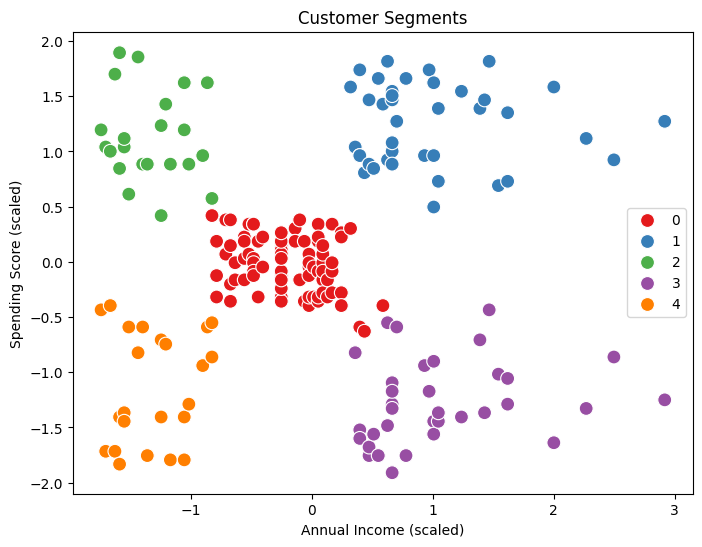

In [31]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_scaled[:,0], y=X_scaled[:,1], hue=df["Cluster"], palette="Set1", s=100)
plt.title("Customer Segments")
plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.legend()
plt.show()

In [32]:
print("\nCluster Averages:")
print(df.groupby("Cluster").mean(numeric_only=True))


Cluster Averages:
         CustomerID        Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                                   
0         86.320988  42.716049           55.296296               49.518519
1        162.000000  32.692308           86.538462               82.128205
2         23.090909  25.272727           25.727273               79.363636
3        164.371429  41.114286           88.200000               17.114286
4         23.000000  45.217391           26.304348               20.913043
